## 8.2 Linear Discriminant Analysis ##
### 8.2.1 numpy ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
class LDA(object):
    
    """
    将相应的类别与数据匹配
    """
    def _class_seprate(self):                                   #数据配对
        class_data = {}                                         #各类别对应的数据
        class_num = {}                                          #各类别对应的数量
        for i in range(self.num):
            if self.target[i] not in class_data:
                class_data[self.target[i]] = []
                class_num[self.target[i]] = 0
            class_data[self.target[i]].append(self.data[i])
            class_num[self.target[i]] +=1
        return class_data,class_num
    
    """
    计算组内均值及总体均值 
    """
    def _cal_mean(self):                                               
        class_mean = {}
        for i in self.class_num:
            class_mean[i] = np.mean(self.class_data[i],axis=0)
        tmean = np.mean(self.data,axis=0)
        return  class_mean,tmean     
    
    """
    Linear Discriminant Analysis
    参数
    ------
    solver: 计算方法，包括计算协方差矩阵特征值特征向量(eig)以及奇异值分解(svd)
    components: 降维后的维度
    data: 数据
    target: 类别
    feature: 特征数量
    num: 样本数量
    class_data: 各类别包含的数据
    class_num: 各类别的样本数量
    class_mean: 各类别的均值
    tmean: 总体均值
    Sw: 组内散度矩阵
    Sb: 组间散度矩阵
    St: 总散度矩阵
    w: 降维矩阵
    eig_val: 特征值
    eig_vec: 特征向量
    返回值
    -------
    transformed: 降维后各个类别的数据
    """
    def __init__(self,components,data,target,solver = 'eigen'):
        self.solver = solver                                    #方法
        self.components = components                            #降维后的维度
        self.data = data                                        #数据
        self.target = target                                    #类别
        self.feature = self.data.shape[1]                       #数据特征数量
        self.num = self.data.shape[0]                           #样本数量
        self.class_data,self.class_num = self._class_seprate()  #数据配对
        self.class_mean,self.tmean = self._cal_mean()           #均值
        self.Sw = np.zeros([self.feature,self.feature])         #组内散度矩阵
        self.Sb = np.zeros([self.feature,self.feature])         #组间散度矩阵
        self.St = np.zeros([self.feature,self.feature])         #总散度矩阵
        self.w = np.zeros([self.feature,self.components])       #降维矩阵
        self.eig_val = np.zeros([self.feature])                 #特征值
        self.eig_vec = np.zeros([self.feature,self.feature])    #特征向量
    
    """
    计算散度
    """
    def _cal_scat(self):                                        
        for i in self.class_data:
            _temp = self.class_data[i] - self.class_mean[i]     #组内散度
            self.Sw += (_temp.T).dot(_temp)
            _temp = self.class_data[i] - self.tmean             #总散度
            self.St += (_temp.T).dot(_temp)
        self.Sb = self.St - self.Sw                             #组间散度
    
    """
    计算Sw-1*Sb的特征值特征向量
    """
    def _cal_eigen(self):
        self.eig_val,self.eig_vec = np.linalg.eig(np.linalg.inv(self.Sw).dot(self.Sb)) 
    
#    def _svd(self):                                             #svd计算矩阵特征值特征向量
#后续添加

     
    """
    将特征向量特征值配对，按特征值从大到小排列，取出前components个特征向量构建矩阵w
    """     
    def _generate_matrix(self):
        eig_pairs = [(np.abs(self.eig_val[i]), self.eig_vec[:,i]) for i in range(len(self.eig_val))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)       #配对排序
        for i in range(self.components):
            self.w[:,i] = eig_pairs[i][1].reshape(self.feature,)          #构造矩阵
    
    def run(self):
        transformed = {}
        self._cal_scat()
        if self.solver == 'eigen':
            self._cal_eigen()
        if self.solver == 'svd':
            self._cal_eigen()
        self._generate_matrix()        
            
        for i in self.class_data:
            self.class_data[i] -= self.tmean
            transformed[i] = np.array(self.class_data[i]).dot(self.w)
        return transformed

In [3]:
irisset = datasets.load_iris()
irissettarget = np.array(irisset.target)
irisset = np.array(irisset.data)
mylda = LDA(2,irisset,irissettarget)
mytransformed = mylda.run()

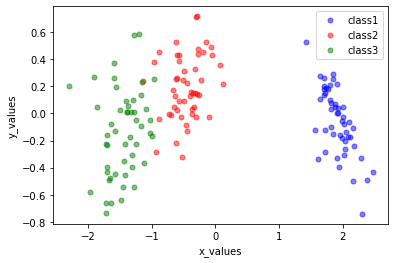

In [4]:
plt.plot(mytransformed[0][:,0], mytransformed[0][:,1], 'o', markersize=5, color='blue', alpha=0.5, label='class1')
plt.plot(mytransformed[1][:,0], mytransformed[1][:,1], 'o', markersize=5, color='red', alpha=0.5, label='class2')
plt.plot(mytransformed[2][:,0], mytransformed[2][:,1], 'o', markersize=5, color='green', alpha=0.5, label='class3')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

### 8.2.2 sklearn package ###

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
irisset = datasets.load_iris()
irissettarget = np.array(irisset.target)
irisset = np.array(irisset.data)

In [6]:
lda = LinearDiscriminantAnalysis(n_components=2)
transformed = lda.fit(irisset,irissettarget).transform(irisset)

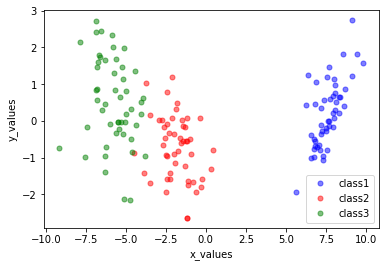

In [7]:
plt.plot(transformed[0:50,0], transformed[0:50,1], 'o', markersize=5, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[50:100,0], transformed[50:100,1], 'o', markersize=5, color='red', alpha=0.5, label='class2')
plt.plot(transformed[100:150,0], transformed[100:150,1], 'o', markersize=5, color='green', alpha=0.5, label='class3')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()